In [2]:
from bs4 import BeautifulSoup
import requests

#Fetch the pages
result= requests.get('https://www.gutenberg.org/cache/epub/1342/pg1342-images.html')
result.status_code
result.headers

{'Date': 'Thu, 06 Jul 2023 08:01:35 GMT', 'Server': 'Apache', 'Content-Location': 'pg1342-images.html.utf8', 'Vary': 'negotiate', 'TCN': 'choice', 'Last-Modified': 'Sat, 01 Jul 2023 13:29:04 GMT', 'Accept-Ranges': 'bytes', 'Content-Length': '851909', 'X-Backend': 'gutenweb1', 'Content-Type': 'text/html; charset=utf-8'}

In [3]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
  #Page Content:
content= result.text
#Create Soup
soup= BeautifulSoup(content, 'lxml')
#HTML in readable format:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <style>
   #pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #project-gutenberg-license {
    font-size: 110%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-header-heading {
    all: inherit;
    text-align: center;
    font-size: 110%;
}
#pg-footer-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight: normal;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header p {
    text-indent: -4em;
    padding-left: 4em;
    margin-top: 1em;
}
#pg

In [13]:
elements = soup.find_all("p", class_="nind")  # Find all the <p> elements with the specified class
paragraphs=[]
for element in elements:
    # Extract the text from each element
    text= element.get_text()
    #print(text)
    # Remove whitespace characters
    text = text.strip().replace('\n', ' ').replace('\r\n', ' ')
    #Storing it in list
    paragraphs.append(text.split())

In [14]:
paragraphs

[['IT',
  'is',
  'a',
  'truth',
  'universally',
  'acknowledged,',
  'that',
  'a',
  'single',
  'man',
  'in',
  'possession',
  'of',
  'a',
  'good',
  'fortune',
  'must',
  'be',
  'in',
  'want',
  'of',
  'a',
  'wife.'],
 ['R.',
  'BENNET',
  'was',
  'among',
  'the',
  'earliest',
  'of',
  'those',
  'who',
  'waited',
  'on',
  'Mr.',
  'Bingley.',
  'He',
  'had',
  'always',
  'intended',
  'to',
  'visit',
  'him,',
  'though',
  'to',
  'the',
  'last',
  'always',
  'assuring',
  'his',
  'wife',
  'that',
  'he',
  'should',
  'not',
  'go;',
  'and',
  'till',
  'the',
  'evening',
  'after',
  'the',
  'visit',
  'was',
  'paid',
  'she',
  'had',
  'no',
  'knowledge',
  'of',
  'it.',
  'It',
  'was',
  'then',
  'disclosed',
  'in',
  'the',
  'following',
  'manner.',
  'Observing',
  'his',
  'second',
  'daughter',
  'employed',
  'in',
  'trimming',
  'a',
  'hat,',
  'he',
  'suddenly',
  'addressed',
  'her',
  'with,—'],
 ['OT',
  'all',
  'that',
  'M

In [30]:
# Unpack the list into individual elements
words = [word.capitalize() for paragraph in paragraphs for word in paragraph]
print(words)

['It', 'Is', 'A', 'Truth', 'Universally', 'Acknowledged,', 'That', 'A', 'Single', 'Man', 'In', 'Possession', 'Of', 'A', 'Good', 'Fortune', 'Must', 'Be', 'In', 'Want', 'Of', 'A', 'Wife.', 'R.', 'Bennet', 'Was', 'Among', 'The', 'Earliest', 'Of', 'Those', 'Who', 'Waited', 'On', 'Mr.', 'Bingley.', 'He', 'Had', 'Always', 'Intended', 'To', 'Visit', 'Him,', 'Though', 'To', 'The', 'Last', 'Always', 'Assuring', 'His', 'Wife', 'That', 'He', 'Should', 'Not', 'Go;', 'And', 'Till', 'The', 'Evening', 'After', 'The', 'Visit', 'Was', 'Paid', 'She', 'Had', 'No', 'Knowledge', 'Of', 'It.', 'It', 'Was', 'Then', 'Disclosed', 'In', 'The', 'Following', 'Manner.', 'Observing', 'His', 'Second', 'Daughter', 'Employed', 'In', 'Trimming', 'A', 'Hat,', 'He', 'Suddenly', 'Addressed', 'Her', 'With,—', 'Ot', 'All', 'That', 'Mrs.', 'Bennet,', 'However,', 'With', 'The', 'Assistance', 'Of', 'Her', 'Five', 'Daughters,', 'Could', 'Ask', 'On', 'The', 'Subject,', 'Was', 'Sufficient', 'To', 'Draw', 'From', 'Her', 'Husband', 

In [32]:
import string
new_list = [''.join(char for char in item
                    if char not in string.punctuation)
            for item in words]
print(new_list)

['It', 'Is', 'A', 'Truth', 'Universally', 'Acknowledged', 'That', 'A', 'Single', 'Man', 'In', 'Possession', 'Of', 'A', 'Good', 'Fortune', 'Must', 'Be', 'In', 'Want', 'Of', 'A', 'Wife', 'R', 'Bennet', 'Was', 'Among', 'The', 'Earliest', 'Of', 'Those', 'Who', 'Waited', 'On', 'Mr', 'Bingley', 'He', 'Had', 'Always', 'Intended', 'To', 'Visit', 'Him', 'Though', 'To', 'The', 'Last', 'Always', 'Assuring', 'His', 'Wife', 'That', 'He', 'Should', 'Not', 'Go', 'And', 'Till', 'The', 'Evening', 'After', 'The', 'Visit', 'Was', 'Paid', 'She', 'Had', 'No', 'Knowledge', 'Of', 'It', 'It', 'Was', 'Then', 'Disclosed', 'In', 'The', 'Following', 'Manner', 'Observing', 'His', 'Second', 'Daughter', 'Employed', 'In', 'Trimming', 'A', 'Hat', 'He', 'Suddenly', 'Addressed', 'Her', 'With—', 'Ot', 'All', 'That', 'Mrs', 'Bennet', 'However', 'With', 'The', 'Assistance', 'Of', 'Her', 'Five', 'Daughters', 'Could', 'Ask', 'On', 'The', 'Subject', 'Was', 'Sufficient', 'To', 'Draw', 'From', 'Her', 'Husband', 'Any', 'Satisfac

In [16]:
import re
cleaned_list = [re.sub(".;,?:""-_", "", line) for line in words]
cleaned_list

['It',
 'Is',
 'A',
 'Truth',
 'Universally',
 'Acknowledged,',
 'That',
 'A',
 'Single',
 'Man',
 'In',
 'Possession',
 'Of',
 'A',
 'Good',
 'Fortune',
 'Must',
 'Be',
 'In',
 'Want',
 'Of',
 'A',
 'Wife.',
 'R.',
 'Bennet',
 'Was',
 'Among',
 'The',
 'Earliest',
 'Of',
 'Those',
 'Who',
 'Waited',
 'On',
 'Mr.',
 'Bingley.',
 'He',
 'Had',
 'Always',
 'Intended',
 'To',
 'Visit',
 'Him,',
 'Though',
 'To',
 'The',
 'Last',
 'Always',
 'Assuring',
 'His',
 'Wife',
 'That',
 'He',
 'Should',
 'Not',
 'Go;',
 'And',
 'Till',
 'The',
 'Evening',
 'After',
 'The',
 'Visit',
 'Was',
 'Paid',
 'She',
 'Had',
 'No',
 'Knowledge',
 'Of',
 'It.',
 'It',
 'Was',
 'Then',
 'Disclosed',
 'In',
 'The',
 'Following',
 'Manner.',
 'Observing',
 'His',
 'Second',
 'Daughter',
 'Employed',
 'In',
 'Trimming',
 'A',
 'Hat,',
 'He',
 'Suddenly',
 'Addressed',
 'Her',
 'With,—',
 'Ot',
 'All',
 'That',
 'Mrs.',
 'Bennet,',
 'However,',
 'With',
 'The',
 'Assistance',
 'Of',
 'Her',
 'Five',
 'Daughters,

In [33]:
from collections import Counter
word_counts= Counter(new_list)
# Print the word frequencies
for word, count in word_counts.items():
    print(f"{word}: {count}")

It: 79
Is: 5
A: 133
Truth: 3
Universally: 1
Acknowledged: 1
That: 84
Single: 3
Man: 6
In: 148
Possession: 4
Of: 293
Good: 11
Fortune: 4
Must: 14
Be: 63
Want: 3
Wife: 8
R: 7
Bennet: 24
Was: 160
Among: 2
The: 411
Earliest: 2
Those: 6
Who: 14
Waited: 4
On: 50
Mr: 67
Bingley: 19
He: 95
Had: 132
Always: 5
Intended: 1
To: 275
Visit: 13
Him: 57
Though: 12
Last: 6
Assuring: 1
His: 116
Should: 10
Not: 65
Go: 2
And: 268
Till: 6
Evening: 6
After: 20
Paid: 2
She: 115
No: 25
Knowledge: 2
Then: 10
Disclosed: 1
Following: 4
Manner: 8
Observing: 3
Second: 5
Daughter: 9
Employed: 2
Trimming: 1
Hat: 1
Suddenly: 2
Addressed: 2
Her: 162
With—: 2
Ot: 1
All: 39
Mrs: 21
However: 10
With: 76
Assistance: 1
Five: 6
Daughters: 4
Could: 42
Ask: 1
Subject: 4
Sufficient: 1
Draw: 1
From: 47
Husband: 6
Any: 17
Satisfactory: 2
Description: 1
They: 47
Attacked: 1
Various: 1
Ways: 1
Barefaced: 1
Questions: 3
Ingenious: 1
Suppositions: 1
Distant: 2
Surmises: 1
But: 50
Eluded: 1
Skill: 1
Them: 35
Were: 47
At11: 1
Obliged:

In [34]:
print(word_counts)

Counter({'The': 411, 'Of': 293, 'To': 275, 'And': 268, 'Her': 162, 'Was': 160, 'In': 148, 'A': 133, 'Had': 132, 'His': 116, 'She': 115, 'He': 95, 'That': 84, 'For': 81, 'It': 79, 'With': 76, 'As': 70, 'Mr': 67, 'Not': 65, 'Be': 63, 'At': 63, 'Him': 57, 'By': 51, 'On': 50, 'But': 50, 'From': 47, 'They': 47, 'Were': 47, 'Which': 47, 'Could': 42, 'Their': 41, 'All': 39, 'Elizabeth': 38, 'Been': 37, 'Them': 35, 'Very': 33, 'An': 33, 'Such': 28, 'Have': 28, 'Jane': 27, 'No': 25, 'Before': 25, 'Bennet': 24, 'Would': 24, 'What': 22, 'Mrs': 21, 'Or': 21, 'After': 20, 'Darcy': 20, 'Herself': 20, 'Than': 20, 'Bingley': 19, 'Time': 19, 'Collins': 19, 'When': 18, 'This': 18, 'Morning': 18, 'Any': 17, 'Lady': 17, 'More': 17, 'Much': 17, 'Family': 17, 'Some': 17, 'Soon': 16, 'Only': 15, 'Sister': 15, 'So': 15, 'Might': 15, 'Must': 14, 'Who': 14, 'Next': 14, 'Being': 14, 'Day': 14, 'Two': 14, 'Did': 14, 'I': 14, 'Visit': 13, 'Pleasure': 13, 'Own': 13, 'Miss': 13, 'First': 13, 'Catherine': 13, 'One': 

In [35]:
print(word_counts.most_common()[:80]) #Top 80



[('The', 411), ('Of', 293), ('To', 275), ('And', 268), ('Her', 162), ('Was', 160), ('In', 148), ('A', 133), ('Had', 132), ('His', 116), ('She', 115), ('He', 95), ('That', 84), ('For', 81), ('It', 79), ('With', 76), ('As', 70), ('Mr', 67), ('Not', 65), ('Be', 63), ('At', 63), ('Him', 57), ('By', 51), ('On', 50), ('But', 50), ('From', 47), ('They', 47), ('Were', 47), ('Which', 47), ('Could', 42), ('Their', 41), ('All', 39), ('Elizabeth', 38), ('Been', 37), ('Them', 35), ('Very', 33), ('An', 33), ('Such', 28), ('Have', 28), ('Jane', 27), ('No', 25), ('Before', 25), ('Bennet', 24), ('Would', 24), ('What', 22), ('Mrs', 21), ('Or', 21), ('After', 20), ('Darcy', 20), ('Herself', 20), ('Than', 20), ('Bingley', 19), ('Time', 19), ('Collins', 19), ('When', 18), ('This', 18), ('Morning', 18), ('Any', 17), ('Lady', 17), ('More', 17), ('Much', 17), ('Family', 17), ('Some', 17), ('Soon', 16), ('Only', 15), ('Sister', 15), ('So', 15), ('Might', 15), ('Must', 14), ('Who', 14), ('Next', 14), ('Being', 

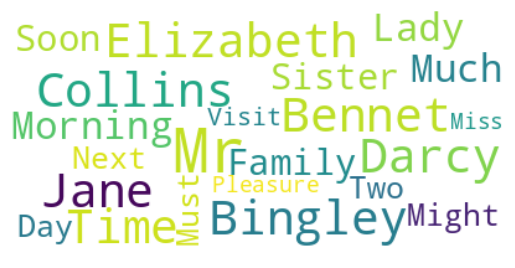

In [41]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import numpy as np

stopwords = set(STOPWORDS)


#Creating the text variable
word_frequencies = word_counts.most_common()[:80]

# Convert word frequencies to a list of words
words = [word[0] for word in word_frequencies]
#print(words)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(max_font_size=50, max_words=100, collocations=False, stopwords=stopwords, background_color='white').generate(' '.join(words)) #
#word_cloud = WordCloud(max_font_size=50, max_words=100, collocations=False, stopwords=stopwords, background_color='white').generate_from_frequencies(' '.join(words))
# Display the word cloud using matplotlib
#plt.figure(figsize=(10, 20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


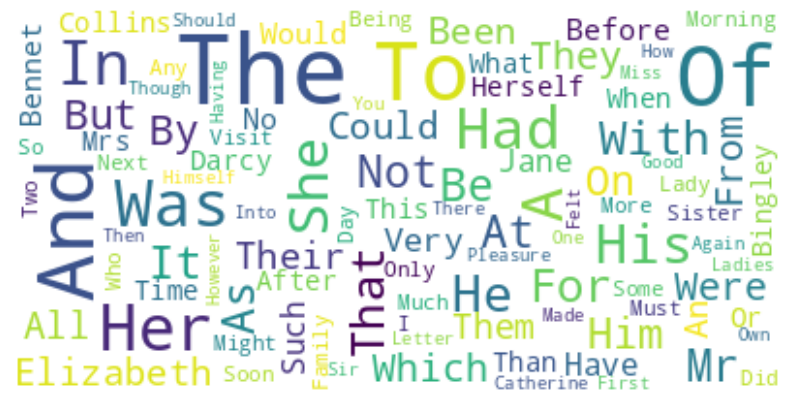

In [51]:
wordcloud = WordCloud(max_font_size=50, max_words=100, collocations=False, stopwords=stopwords, background_color='white')
wordcloud.generate_from_frequencies(frequencies= word_counts)
plt.figure(figsize=(10,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()